<a href="https://colab.research.google.com/github/KouserImam/Inverse-Compton/blob/main/Inverse_compton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inverse Compton
The goal of this notebook is to demonstrate Inverse Compton Scattering in AGN.

Begin by installing and importing the necessary python libraries

In [ ]:
import sys
import numpy as np
from ipywidgets import interact, interactive
import ipywidgets as widgets

!{sys.executable} -m pip install --quiet matplotlib
!{sys.executable} -m pip install --quiet agnpy

import matplotlib.pyplot as plt

# Types of inverse compton scattering

There are two types of inverse compton , Synchrotron self compton and and external compton. The cell below will show the SED for synchrotron self compton.

Define some routines for the notebook.  Create an array.

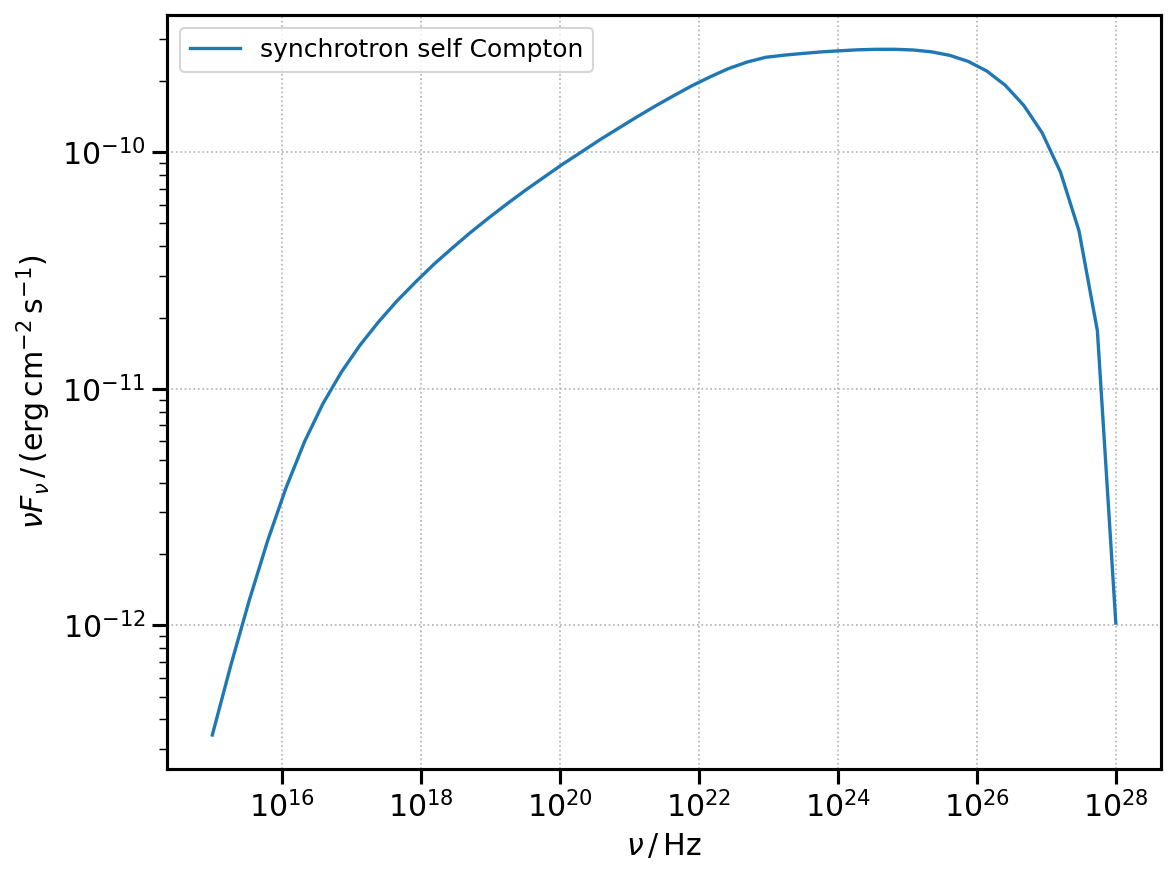

In [ ]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e
from astropy.coordinates import Distance
from agnpy.spectra import PowerLaw
from agnpy.emission_regions import Blob
from agnpy.compton import SynchrotronSelfCompton
from agnpy.utils.plot import plot_sed, load_mpl_rc
import matplotlib.pyplot as plt


# set the quantities defining the blob
R_b = 1e16 * u.cm
V_b = 4 / 3 * np.pi * R_b ** 3
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10
B = 1 * u.G

# electron distribution
W_e = 1e48 * u.erg # total energy in electrons

n_e = PowerLaw.from_total_energy(
    W_e,
    V_b,
    p=2.8,
    gamma_min=1e2,
    gamma_max=1e7,
    mass=m_e,
)

# define the emission region and the radiative process
blob = Blob(R_b, z, delta_D, Gamma, B, n_e=n_e)
ssc = SynchrotronSelfCompton(blob)

# compute the SED over an array of frequencies
nu = np.logspace(15, 28) * u.Hz
sed = ssc.sed_flux(nu)

# plot it
load_mpl_rc()
plot_sed(nu, sed, label="synchrotron self Compton")

plt.show()

Now plot a line with variable slope.

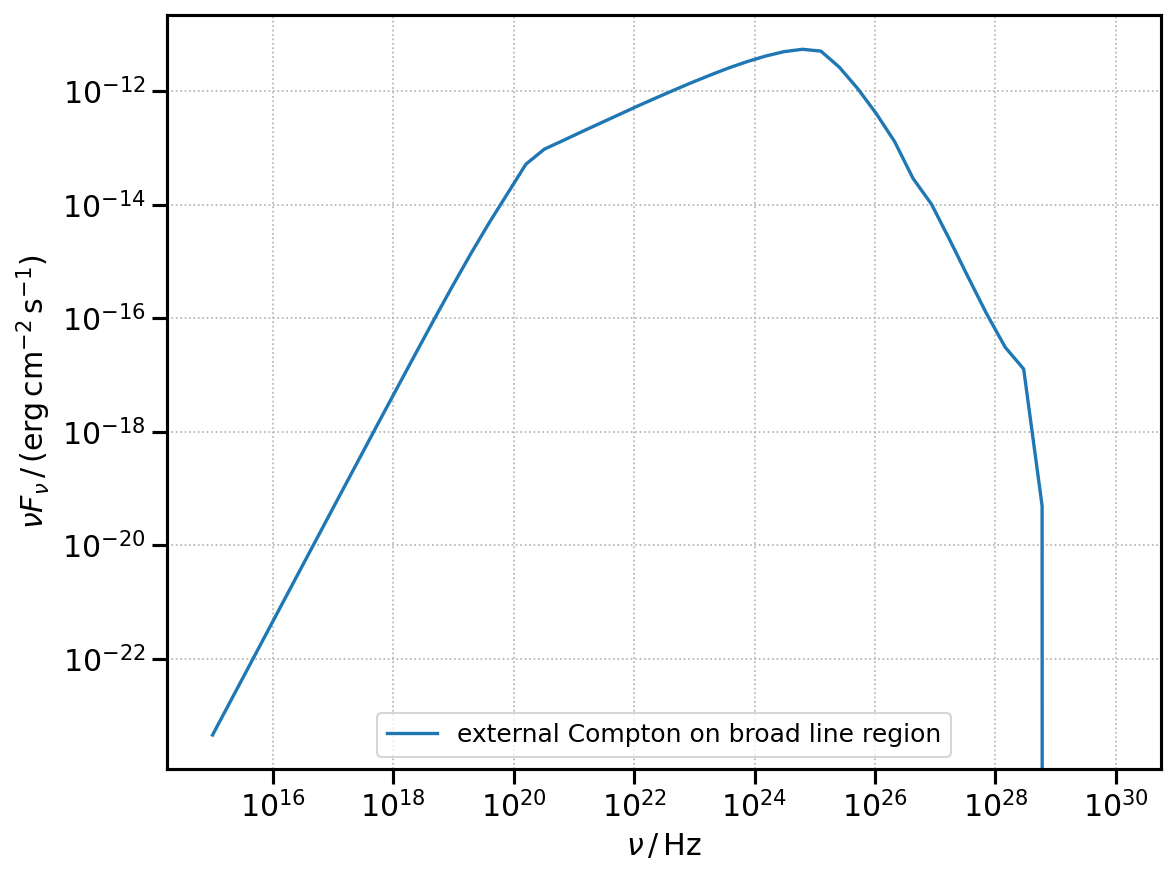

In [ ]:
import numpy as np
import astropy.units as u
from astropy.constants import m_e
from agnpy.spectra import BrokenPowerLaw
from agnpy.emission_regions import Blob
from agnpy.compton import ExternalCompton
from agnpy.targets import SphericalShellBLR
from agnpy.utils.plot import plot_sed
import matplotlib.pyplot as plt
from agnpy.utils.plot import load_mpl_rc



# define the emission region and the electron distribution
R_b = 1e16 * u.cm
V_b = 4 / 3 * np.pi * R_b ** 3
z = 1
delta_D = 40
Gamma = 40
B = 0.56 * u.G

W_e = 6e45 * u.erg
n_e = BrokenPowerLaw.from_total_energy(
    W=W_e, V=V_b, p1=2.0, p2=3.5, gamma_b=1e4, gamma_min=20, gamma_max=5e7, mass=m_e
)

blob = Blob(R_b, z, delta_D, Gamma, B, n_e, gamma_e_size=500)


# define the target
L_disk = 2 * 1e46 * u.Unit("erg s-1")
xi_line = 0.024
R_line = 1e17 * u.cm

blr = SphericalShellBLR(L_disk, xi_line, "Lyalpha", R_line)


# declare the external Compton process
# distance between the blob and the target
r = 2e17 * u.cm
ec = ExternalCompton(blob, blr, r)

# compute the SED over an array of frequencies
nu = np.logspace(15, 30) * u.Hz
sed = ec.sed_flux(nu)

# plot it
load_mpl_rc()
plot_sed(nu, sed, label="external Compton on broad line region")

plt.show()


By changing the parameters one can check for different scenarios.